<a href="https://colab.research.google.com/github/YalcEs/Data-Analyst-Portfolio/blob/main/iris_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iris:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F19%2F420%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T222014Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D80b9c19c26f2c4bd2df35204248c744e7cb30d5d32d2aa66aed4be43a807ffc0e2cf59ed99618cdf417338d67aac51846dbf9d01afeff0002c156e765e4dfa8d078122850baf4466ac9ed1b97842aeda2f6d3d31f16753ec2a45300aeb08c8d89b3affed9e3937b4f34838a7d54eca4a417076662871748708cd0c933d5cedd0ae0bd6bf1f0ca834417c9b75a9e1353757ef8b5212506573ab34c2b76d80166d6fe192fc37e6098a893ca064eca53fde954a00251d91baa18266cafd2be8e42290180868c618c23944acc1054939b7ff141a669fb39508b09ea6a29f3cfe11cba35c14c24852d8ff2944690c123f01bdf1ffbb494d5ae938ffb10b8c2b0ddc31'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/iris/Iris.csv")
print(df.head(10))


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.memory_usage()

Index             128
Id               1200
SepalLengthCm    1200
SepalWidthCm     1200
PetalLengthCm    1200
PetalWidthCm     1200
Species          1200
dtype: int64

In [ ]:
df.iloc[0]

Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

In [ ]:
df.iloc[-1]

Id                          150
SepalLengthCm               5.9
SepalWidthCm                3.0
PetalLengthCm               5.1
PetalWidthCm                1.8
Species          Iris-virginica
Name: 149, dtype: object

In [ ]:
df.iloc[::3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa


In [ ]:
df.loc[[0,5,10]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
df.loc [30:40]

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [ ]:
df[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]



,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [ ]:
df.loc[30:40]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa


In [ ]:
df ['SepalLengthCm'] .mean()



5.843333333333334

In [ ]:
df ['SepalLengthCm'] .median()



5.8

In [ ]:
df['Species'].mode()

0        IRIS-SETOSA
1    IRIS-VERSICOLOR
2     IRIS-VIRGINICA
Name: Species, dtype: object

In [ ]:
df['PetalLengthCm'] . std()

1.7644204199522626

In [ ]:
df [['SepalLengthCm', 'SepalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm
SepalLengthCm,1.000000,-0.109369
SepalWidthCm,-0.109369,1.000000


In [ ]:
df [df['SepalLengthCm'] > 6]



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
df [df['Species'] == 'Iris-setosa']

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df[(df['PetalWidthCm'] >= 1) &  (df['PetalWidthCm'] <=2)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
138,139,6.0,3.0,4.8,1.8,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
df[(df['SepalWidthCm'] > 4) &  (df['PetalWidthCm'] <1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [ ]:
df['PetalWidthCm'].fillna(df['PetalWidthCm'].median())

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
df.drop_duplicates(subset='Species')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,IRIS-SETOSA
50,51,7.0,3.2,4.7,1.4,IRIS-VERSICOLOR
100,101,6.3,3.3,6.0,2.5,IRIS-VIRGINICA


In [ ]:

df[df['SepalWidthCm'] > 0].reset_index(drop=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,101,6.3,3.3,6.0,2.5,Iris-virginica
1,145,6.7,3.3,5.7,2.5,Iris-virginica
2,110,7.2,3.6,6.1,2.5,Iris-virginica
3,115,5.8,2.8,5.1,2.4,Iris-virginica
4,141,6.7,3.1,5.6,2.4,Iris-virginica
...,...,...,...,...,...,...
145,14,4.3,3.0,1.1,0.1,Iris-setosa
146,38,4.9,3.1,1.5,0.1,Iris-setosa
147,33,5.2,4.1,1.5,0.1,Iris-setosa
148,35,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df['Species'] = df['Species'].str.upper()
df['Species']

0      IRIS-VIRGINICA
1      IRIS-VIRGINICA
2      IRIS-VIRGINICA
3      IRIS-VIRGINICA
4      IRIS-VIRGINICA
            ...      
145       IRIS-SETOSA
146       IRIS-SETOSA
147       IRIS-SETOSA
148       IRIS-SETOSA
149       IRIS-SETOSA
Name: Species, Length: 150, dtype: object

In [ ]:
df.sort_values(by= 'SepalLengthCm')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,14,4.3,3.0,1.1,0.1,IRIS-SETOSA
120,39,4.4,3.0,1.3,0.2,IRIS-SETOSA
139,43,4.4,3.2,1.3,0.2,IRIS-SETOSA
138,9,4.4,2.9,1.4,0.2,IRIS-SETOSA
111,42,4.5,2.3,1.3,0.3,IRIS-SETOSA
...,...,...,...,...,...,...
7,136,7.7,3.0,6.1,2.3,IRIS-VIRGINICA
25,123,7.7,2.8,6.7,2.0,IRIS-VIRGINICA
8,119,7.7,2.6,6.9,2.3,IRIS-VIRGINICA
16,118,7.7,3.8,6.7,2.2,IRIS-VIRGINICA


In [ ]:
df.sort_values(by='PetalWidthCm', ascending=False)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
...,...,...,...,...,...,...
13,14,4.3,3.0,1.1,0.1,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.sort_values(by=['PetalWidthCm','SepalWidthCm'])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,13,4.8,3.0,1.4,0.1,IRIS-SETOSA
145,14,4.3,3.0,1.1,0.1,IRIS-SETOSA
146,38,4.9,3.1,1.5,0.1,IRIS-SETOSA
148,35,4.9,3.1,1.5,0.1,IRIS-SETOSA
149,10,4.9,3.1,1.5,0.1,IRIS-SETOSA
...,...,...,...,...,...,...
4,141,6.7,3.1,5.6,2.4,IRIS-VIRGINICA
5,137,6.3,3.4,5.6,2.4,IRIS-VIRGINICA
0,101,6.3,3.3,6.0,2.5,IRIS-VIRGINICA
1,145,6.7,3.3,5.7,2.5,IRIS-VIRGINICA


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...,...
122,123,7.7,2.8,6.7,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [ ]:
df.groupby('Species')['SepalLengthCm'].mean()

Species
IRIS-SETOSA        5.006
IRIS-VERSICOLOR    5.936
IRIS-VIRGINICA     6.588
Name: SepalLengthCm, dtype: float64

In [ ]:
df.groupby('Species')['SepalLengthCm'].std()

Species
IRIS-SETOSA        0.352490
IRIS-VERSICOLOR    0.516171
IRIS-VIRGINICA     0.635880
Name: SepalLengthCm, dtype: float64

In [ ]:
df.groupby('Species')['SepalLengthCm'].agg(['min','max','mean'])

,min,max,mean
Species,,,
IRIS-SETOSA,4.3,5.8,5.006
IRIS-VERSICOLOR,4.9,7.0,5.936
IRIS-VIRGINICA,4.9,7.9,6.588


In [ ]:
df['Species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      IRIS-VIRGINICA
1      IRIS-VIRGINICA
2      IRIS-VIRGINICA
3      IRIS-VIRGINICA
4      IRIS-VIRGINICA
            ...      
145       IRIS-SETOSA
146       IRIS-SETOSA
147       IRIS-SETOSA
148       IRIS-SETOSA
149       IRIS-SETOSA
Name: Species, Length: 150, dtype: object>

In [ ]:
df['Species'].value_counts(normalize=True)

Species
IRIS-VIRGINICA     0.333333
IRIS-VERSICOLOR    0.333333
IRIS-SETOSA        0.333333
Name: proportion, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


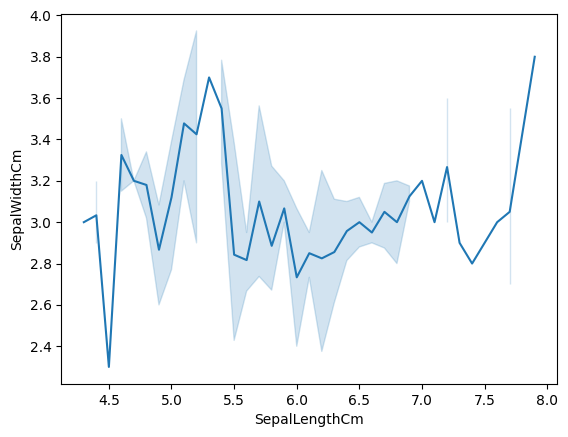

In [ ]:

sns.lineplot(x="SepalLengthCm", y="SepalWidthCm", data=df)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

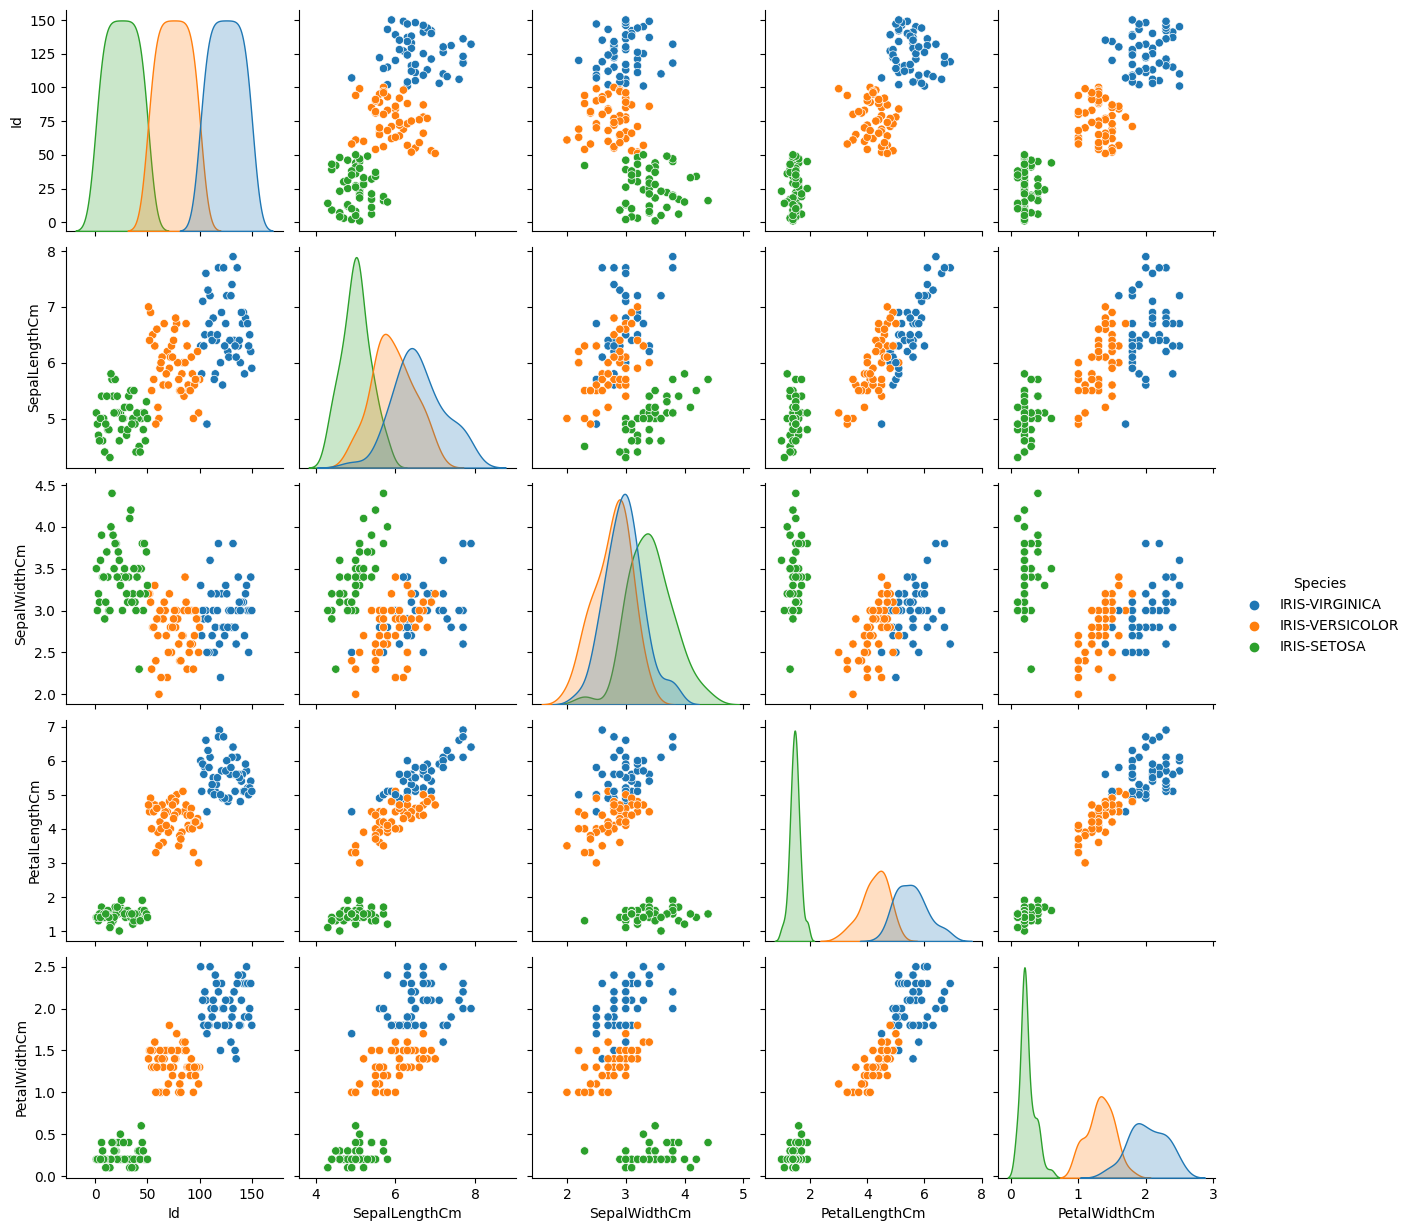

In [ ]:
sns.pairplot(df, hue="Species")
plt.show()

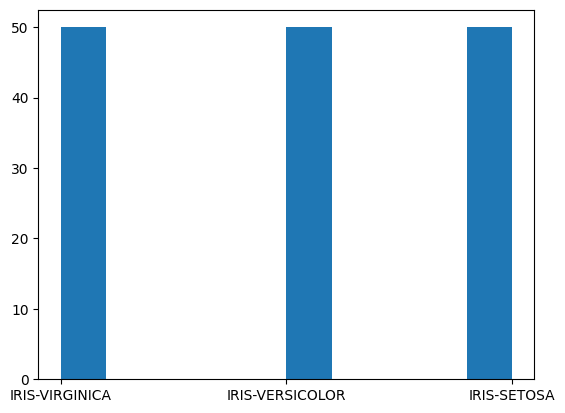

In [ ]:
plt.hist(df["Species"])
plt.show()

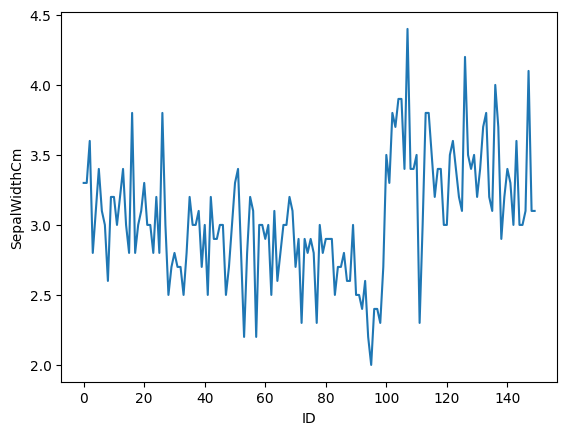

In [ ]:
plt.plot(df["SepalWidthCm"])
plt.xlabel("ID")
plt.ylabel("SepalWidthCm")
plt.show()

Species
IRIS-SETOSA        5.006
IRIS-VERSICOLOR    5.936
IRIS-VIRGINICA     6.588
Name: SepalLengthCm, dtype: float64


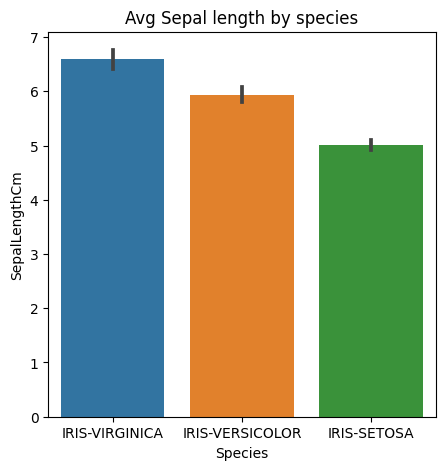

In [ ]:
print(df.groupby("Species").SepalLengthCm.mean())

plt.figure(figsize=(5,5))
plt.title("Avg Sepal length by species")
sns.barplot(x=df["Species"], y= df.SepalLengthCm)
plt.xlabel("Species")
plt.ylabel("SepalLengthCm")
plt.show()

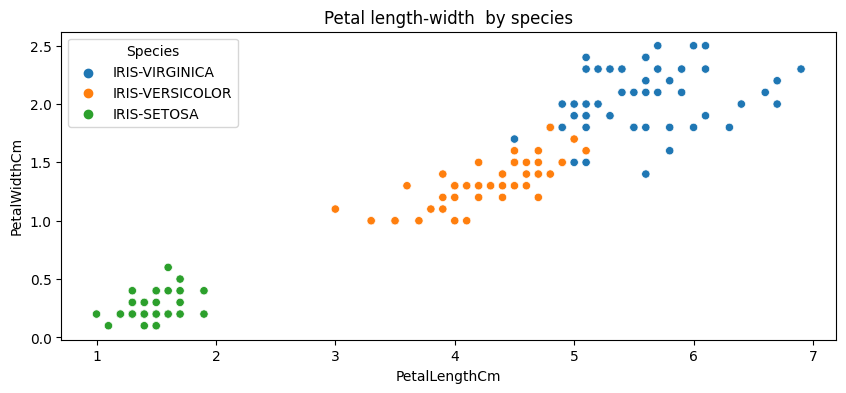

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Petal length-width  by species")
sns.scatterplot(x=df["PetalLengthCm"], y= df["PetalWidthCm"], hue=df["Species"])


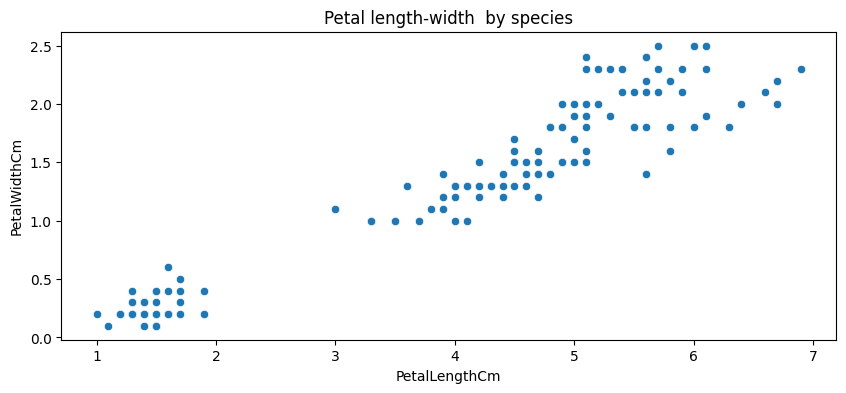

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Petal length-width  by species")
sns.scatterplot(x=df["PetalLengthCm"], y= df["PetalWidthCm"])

AttributeError: 'DataFrame' object has no attribute 'show'

In [ ]:
df1=pd.read_csv("/kaggle/input/iris/Iris.csv")


In [ ]:
setosa = df1.loc[df1.Species=='Iris-setosa']
versi = df1.loc[df1.Species=='Iris-versicolor']
nica = df1.loc[df1.Species=='Iris-virginica']

In [ ]:
setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


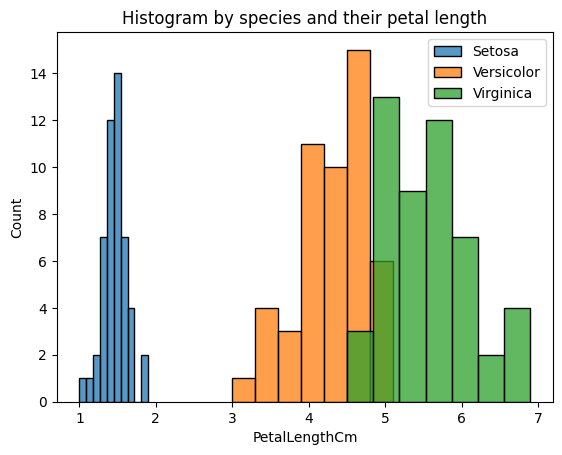

In [ ]:
sns.histplot(setosa['PetalLengthCm'],label='Setosa')
sns.histplot(versi['PetalLengthCm'],label='Versicolor')
sns.histplot(nica['PetalLengthCm'],label='Virginica')
plt.title("Histogram by species and their petal length")
plt.legend()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PetalLengthCm', ylabel='Count'>

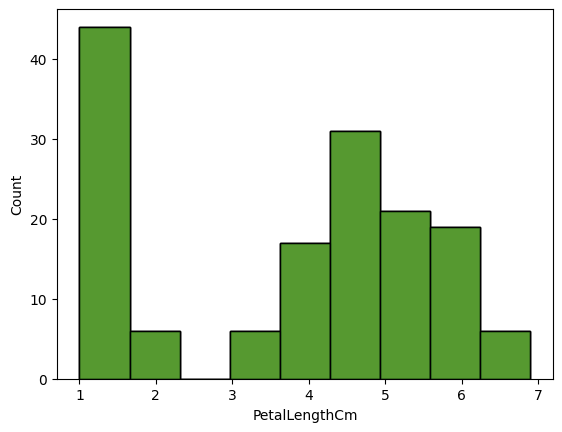

In [ ]:

sns.histplot(df['PetalLengthCm'])
sns.histplot(df['PetalLengthCm'])
sns.histplot(df['PetalLengthCm'])

<Figure size 1000x500 with 0 Axes>

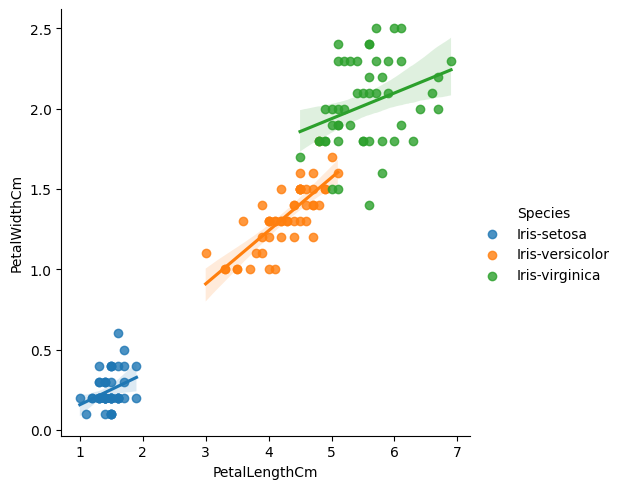

In [ ]:
plt.figure(figsize=(10, 5))
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)

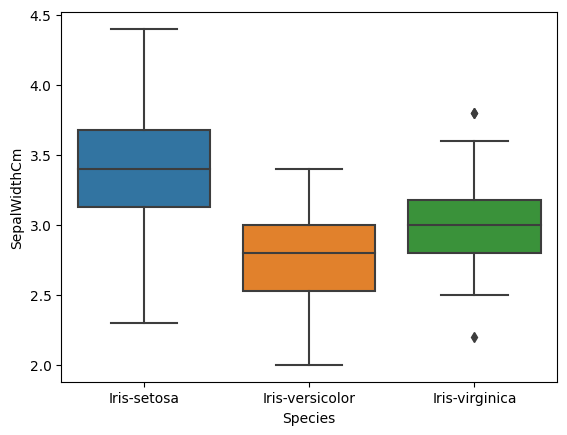

In [ ]:
import seaborn as sns
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.show()

([<matplotlib.patches.Wedge at 0x7bc74e8f62c0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')])

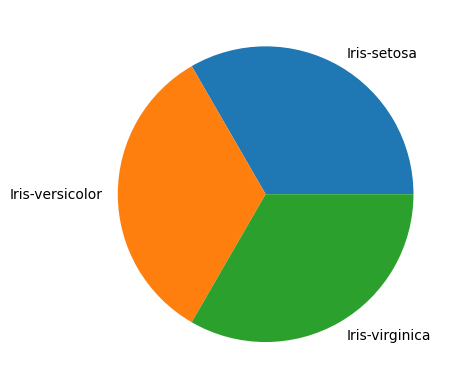

In [ ]:
labels = "Iris-setosa", "Iris-versicolor", "Iris-virginica"
sizes= [50,50,50]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

([<matplotlib.patches.Wedge at 0x7bc74ee8b5e0>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Frogs'),
  Text(-0.33991877217145816, 1.046162142464278, 'Hogs'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Dogs'),
  Text(1.0461621822461364, -0.3399186497354948, 'Logs')])

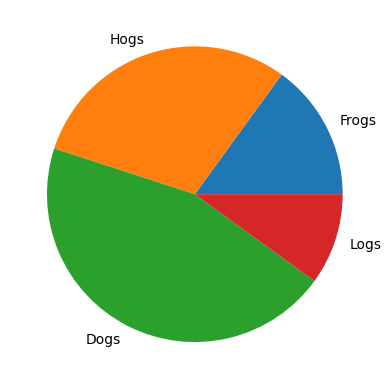

In [ ]:
labels = "Frogs", "Hogs", "Dogs", "Logs"
sizes= [15,30,45,10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)